# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
oil = pd.read_excel('/content/Crude Oil Prices Daily 1986-2023.xlsx')
oil

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


# Data Exploration

In [25]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9612 non-null   datetime64[ns]
 1   Closing Value  9605 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 150.3 KB


In [26]:
oil.isna().value_counts()

Date   Closing Value
False  False            9605
       True                7
dtype: int64

There are 7 null values in data set.

In [27]:
# replacing na values in Closing Value of oil by Forward fill method
oil["Closing Value"].fillna( method ='ffill', inplace = True)
oil

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


Filling Null values by Fill forward method

In [28]:
oil.describe()

,Closing Value
count,9612.000000
mean,46.855562
std,29.560247
min,10.010000
25%,20.120000
50%,38.250000
75%,69.300000
max,145.310000


In [29]:
oil1 = oil.copy()
oil1.head

<bound method NDFrame.head of            Date  Closing Value
0    1986-01-02          25.56
1    1986-01-03          26.00
2    1986-01-06          26.53
3    1986-01-07          25.85
4    1986-01-08          25.87
...         ...            ...
9607 2023-10-03          89.23
9608 2023-10-04          84.22
9609 2023-10-05          82.31
9610 2023-10-06          82.79
9611 2023-10-09          86.38

[9612 rows x 2 columns]>

In [30]:
oil.set_index('Date', inplace=True)
oil

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-10-03,89.23
2023-10-04,84.22
2023-10-05,82.31


# Data Visualization

## line Plot and Histogram

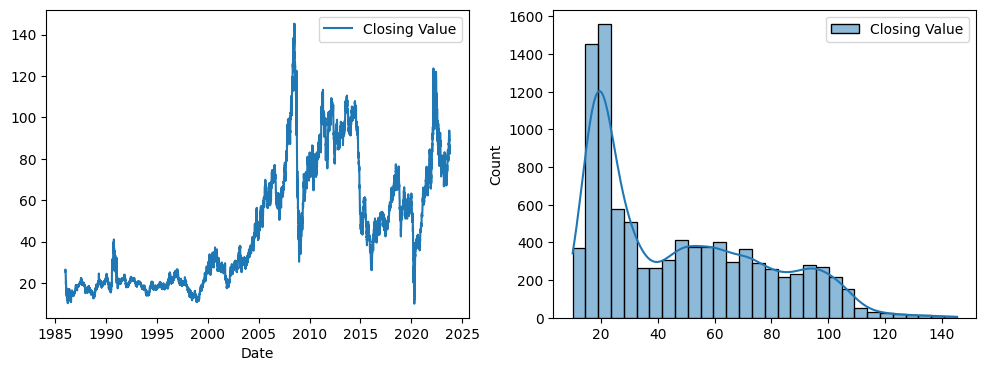

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data=oil)

plt.subplot(1, 2, 2)
sns.histplot(data=oil, kde= True)

plt.show()

The graph show right skewness

## Lag Plot

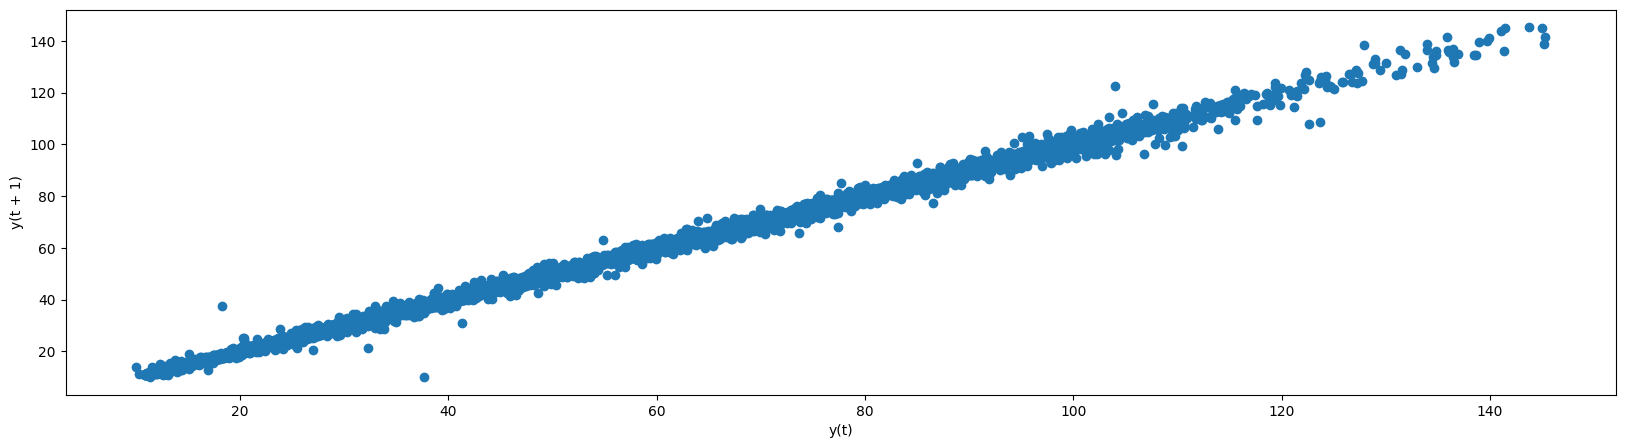

In [32]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
pyplot.figure(figsize = (20,5))
lag_plot(oil)
pyplot.show()

Here the lagplot show linear association between current value and sucession value

## Autocorrelation

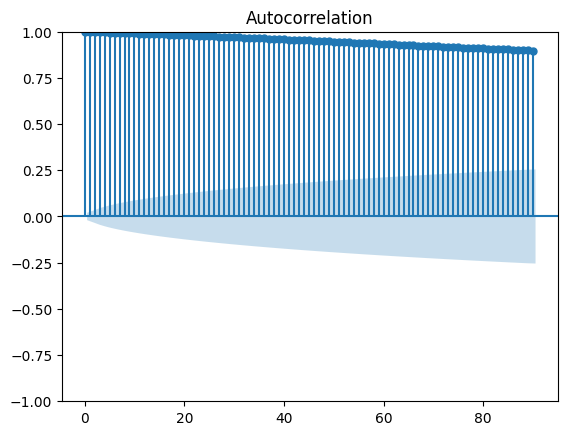

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(oil,lags=90)
pyplot.show()

There is degree of similarity between a time series and a lagged version of itself

## Box Plot

In [34]:
oil.rename(columns={'Closing Value': 'Closing_value', },inplace=True)
print(oil.columns)

Index(['Closing_value'], dtype='object')


In [35]:
oil1

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


In [36]:
oil1['Date'] = pd.to_datetime(oil1.Date, format='%b-%y')
oil1["Month"]=oil1.Date.dt.strftime("%b")
oil1["Year"]=oil1.Date.dt.strftime("%Y")
oil1.head()

,Date,Closing Value,Month,Year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986


In [37]:
oil1.rename(columns={'Closing Value': 'Closing_value', },inplace=True)
print(oil1.columns)

Index(['Date', 'Closing_value', 'Month', 'Year'], dtype='object')


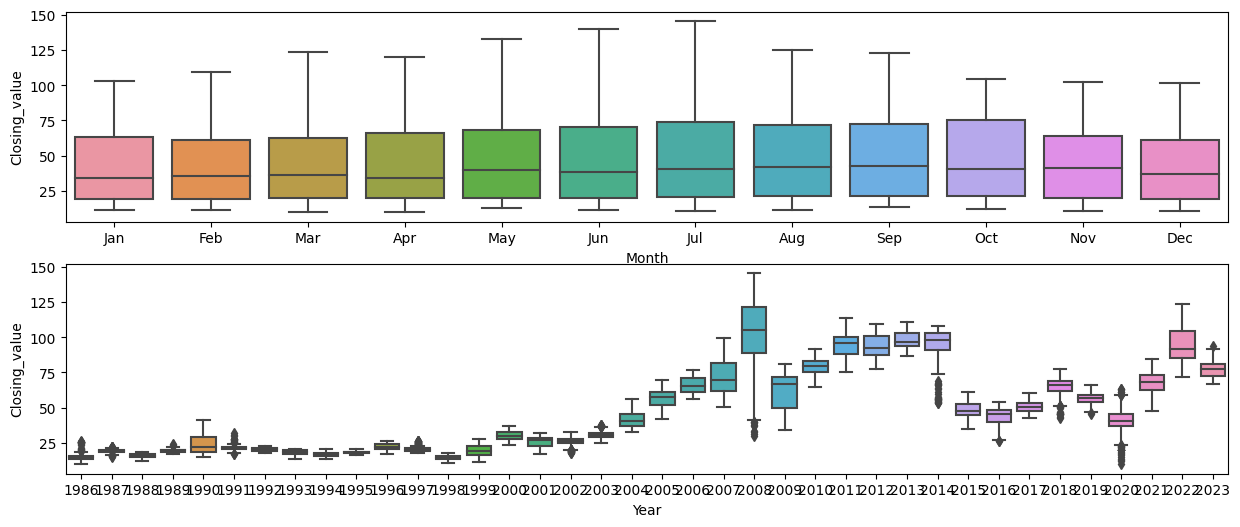

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(211)
sns.boxplot(x="Month", y="Closing_value", data=oil1)
plt.subplot(212)
sns.boxplot(x="Year", y="Closing_value", data=oil1)
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

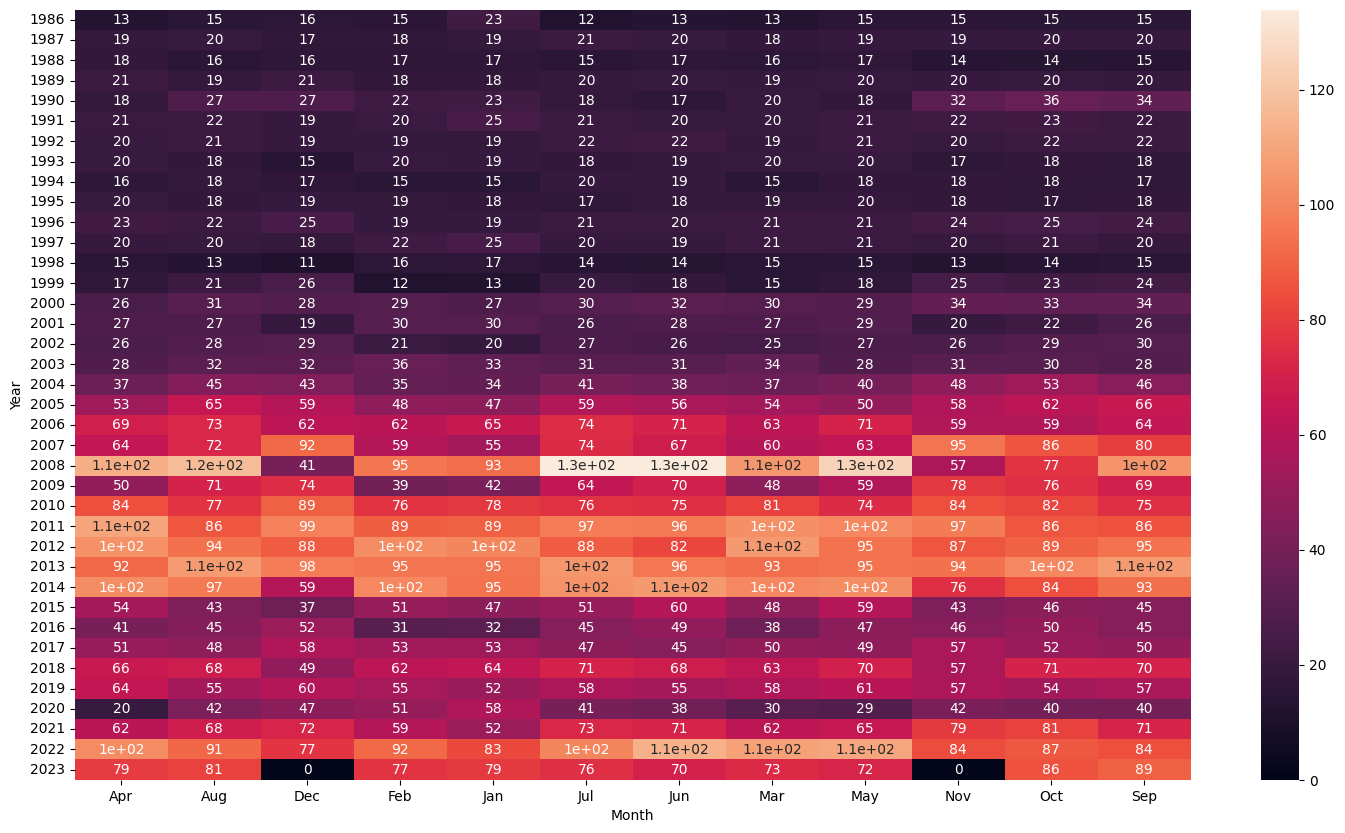

In [39]:
plt.figure(figsize=(18,10))
heatmap_y_month = pd.pivot_table(data=oil1,values='Closing_value',index='Year', columns="Month", aggfunc='mean', fill_value=0)
sns.heatmap(data = heatmap_y_month, annot=True)

In [40]:
new_data=pd.DataFrame(oil1)

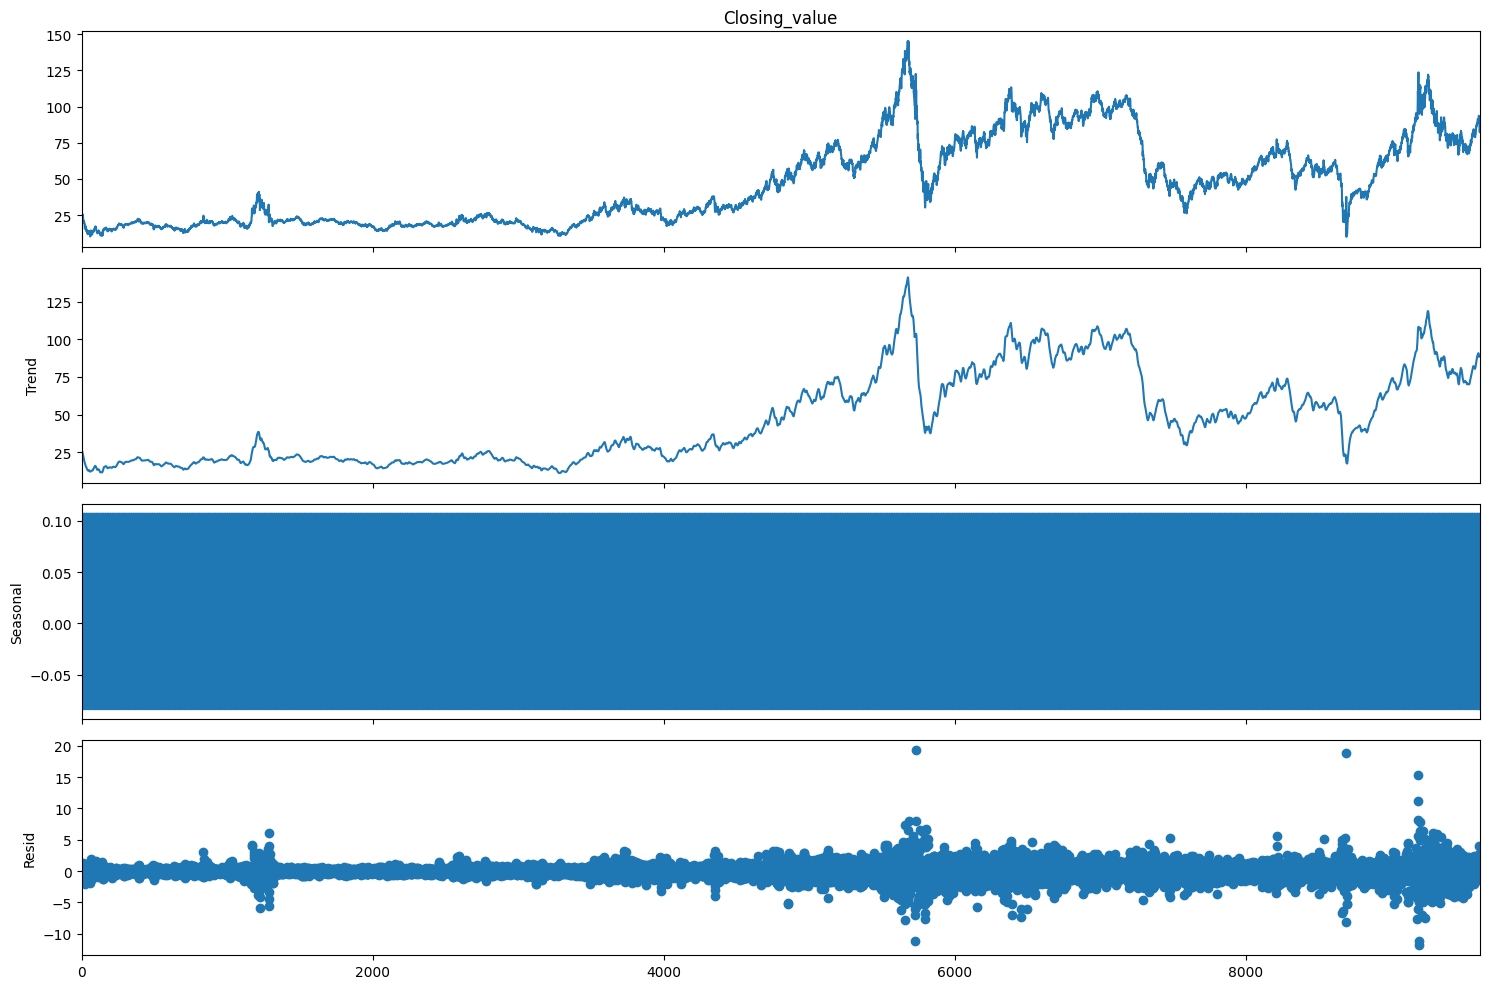

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add=seasonal_decompose(new_data.Closing_value, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(15,10))
    decompose_ts_add.plot()
    plt.show()

## Outliers

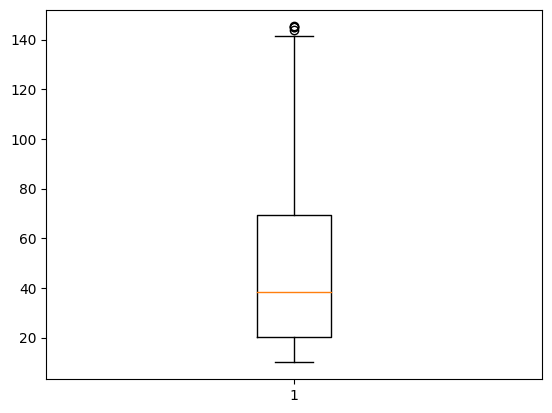

,Closing_value
count,9612.000000
mean,46.855562
std,29.560247
min,10.010000
25%,20.120000
50%,38.250000
75%,69.300000
max,145.310000


In [42]:
#boxplot
plt.boxplot(oil1['Closing_value'])
plt.show()
oil.describe()

In [43]:
q1 = oil1['Closing_value'].quantile(0.25)
q3 = oil1['Closing_value'].quantile(0.75)
IQR = q3-q1

print ('Q1=',q1,'Q3=', q3,'IQR=', IQR)

Q1= 20.12 Q3= 69.3 IQR= 49.17999999999999


In [44]:
upper_limit = q3 + (1.5 * IQR)
lower_limit = q3 - (1.5 * IQR)

print ('Upper Limit=',upper_limit,'Lower Limit=', lower_limit)

Upper Limit= 143.07 Lower Limit= -4.469999999999985


In [45]:
#finding outliers
oil1.loc[(oil1['Closing_value'] > upper_limit) | (oil1['Closing_value'] < lower_limit)]

,Date,Closing_value,Month,Year
5677,2008-07-02,143.74,Jul,2008
5678,2008-07-03,145.31,Jul,2008
5683,2008-07-11,144.96,Jul,2008
5684,2008-07-14,145.16,Jul,2008


In [46]:
# trimming the outlier values
df = oil1.loc[(oil1['Closing_value'] < upper_limit) & (oil1['Closing_value'] > lower_limit)]

print('with ouliers =', len(oil1))
print('after removing outliers =', len(df))

with ouliers = 9612
after removing outliers = 9608


In [47]:
df

,Date,Closing_value,Month,Year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986
...,...,...,...,...
9607,2023-10-03,89.23,Oct,2023
9608,2023-10-04,84.22,Oct,2023
9609,2023-10-05,82.31,Oct,2023
9610,2023-10-06,82.79,Oct,2023


In [48]:
df.to_csv('df')

# Model Building

## Creating Requried transformations

In [49]:
# Creating parameter t
df['t'] = df.index + 1

## Create the parameter t^2
df['t_square'] = df['t'] ** 2

# Create the parameter log_value
import math
df['log_value'] = df['Closing_value'].apply(lambda x: round(math.log(x), 6))

df.head()

<ipython-input-49-45cd1e36e19f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'] = df.index + 1
<ipython-input-49-45cd1e36e19f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_square'] = df['t'] ** 2
<ipython-input-49-45cd1e36e19f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Date,Closing_value,Month,Year,t,t_square,log_value
0,1986-01-02,25.56,Jan,1986,1,1,3.241029
1,1986-01-03,26.00,Jan,1986,2,4,3.258097
2,1986-01-06,26.53,Jan,1986,3,9,3.278276
3,1986-01-07,25.85,Jan,1986,4,16,3.252311
4,1986-01-08,25.87,Jan,1986,5,25,3.253084


In [50]:
# Create dummy variables for the month
month_dummies = pd.get_dummies(df['Date'].dt.strftime('%b'), prefix='', prefix_sep='')
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
#joining the two data sets
df = pd.concat([df, month_dummies], axis=1)
df.head()

,Date,Closing_value,Month,Year,t,t_square,log_value,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1986-01-02,25.56,Jan,1986,1,1,3.241029,0,0,0,0,1,0,0,0,0,0,0,0
1,1986-01-03,26.00,Jan,1986,2,4,3.258097,0,0,0,0,1,0,0,0,0,0,0,0
2,1986-01-06,26.53,Jan,1986,3,9,3.278276,0,0,0,0,1,0,0,0,0,0,0,0
3,1986-01-07,25.85,Jan,1986,4,16,3.252311,0,0,0,0,1,0,0,0,0,0,0,0
4,1986-01-08,25.87,Jan,1986,5,25,3.253084,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
# Reorder the columns to match the reference dataset
df = df[['Date','Closing_value','t','t_square','log_value','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Month','Year']]
df

,Date,Closing_value,t,t_square,log_value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Month,Year
0,1986-01-02,25.56,1,1,3.241029,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
1,1986-01-03,26.00,2,4,3.258097,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
2,1986-01-06,26.53,3,9,3.278276,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
3,1986-01-07,25.85,4,16,3.252311,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
4,1986-01-08,25.87,5,25,3.253084,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,2023-10-03,89.23,9608,92313664,4.491217,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023
9608,2023-10-04,84.22,9609,92332881,4.433432,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023
9609,2023-10-05,82.31,9610,92352100,4.410493,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023
9610,2023-10-06,82.79,9611,92371321,4.416307,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9608 entries, 0 to 9611
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9608 non-null   datetime64[ns]
 1   Closing_value  9608 non-null   float64       
 2   t              9608 non-null   int64         
 3   t_square       9608 non-null   int64         
 4   log_value      9608 non-null   float64       
 5   Jan            9608 non-null   uint8         
 6   Feb            9608 non-null   uint8         
 7   Mar            9608 non-null   uint8         
 8   Apr            9608 non-null   uint8         
 9   May            9608 non-null   uint8         
 10  Jun            9608 non-null   uint8         
 11  Jul            9608 non-null   uint8         
 12  Aug            9608 non-null   uint8         
 13  Sep            9608 non-null   uint8         
 14  Oct            9608 non-null   uint8         
 15  Nov            9608 n

## Splitting Data

In [54]:
df.set_index('Date', inplace=True)

In [55]:
Train = df.head(8000)
Test = df.tail(1608)

In [56]:
Train.tail()

,Closing_value,t,t_square,log_value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Month,Year
Date,,,,,,,,,,,,,,,,,,
2017-08-30,45.96,8000,64000000,3.827771,0,0,0,0,0,0,0,1,0,0,0,0,Aug,2017
2017-08-31,47.23,8001,64016001,3.855029,0,0,0,0,0,0,0,1,0,0,0,0,Aug,2017
2017-09-01,47.29,8002,64032004,3.856299,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-04,47.37,8003,64048009,3.857989,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-05,48.66,8004,64064016,3.884857,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017


In [57]:
Test.head()

,Closing_value,t,t_square,log_value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Month,Year
Date,,,,,,,,,,,,,,,,,,
2017-09-06,49.16,8005,64080025,3.895080,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-07,49.09,8006,64096036,3.893655,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-08,47.48,8007,64112049,3.860309,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-11,48.07,8008,64128064,3.872658,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-12,48.23,8009,64144081,3.875981,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017


Splitting data from total 9608 content into training and testing data sequentially  

## Linear Operation

In [58]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Closing_value~t',data=Train).fit()                                                        # fitting the model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                           # prediction
rmse_linear = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_linear))**2))                        # RMSE
rmse_linear

29.44263930120598

## EX-Logerithmic Operation

In [59]:
Exp = smf.ols('log_value~t',data=Train).fit()                                                                  # fitting the model
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))                                                     # prediction
rmse_Exp = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(np.exp(pred_Exp)))**2))                   # RMSE
rmse_Exp


45.67853008211834

## Quadratic Operation

In [60]:
Quad = smf.ols('Closing_value~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_Quad))**2))
rmse_Quad

34.51465818450958

## Additive seasonality

In [61]:
add_sea = smf.ols('Closing_value~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_add_sea))**2))
rmse_add_sea

29.65052044386563

## Additive Seasonality Quadratic

In [62]:
add_sea_Quad = smf.ols('Closing_value~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

34.466165163648284

## Multiplicative Seasonality

In [63]:
Mul_sea = smf.ols('log_value~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

36.76113298670699

## Multiplicative Additive Seasonality

In [64]:
Mul_Add_sea = smf.ols('log_value~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

45.7866312087195

In [65]:
#Compare the results

Result = {"MODEL":pd.Series(["rmse_linear","rmse_Exp-log","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(Result)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,29.442639
3,rmse_add_sea,29.650520
4,rmse_add_sea_quad,34.466165
2,rmse_Quad,34.514658
5,rmse_Mult_sea,36.761133
1,rmse_Exp-log,45.678530
6,rmse_Mult_add_sea,45.786631


<Axes: xlabel='MODEL', ylabel='RMSE_Values'>

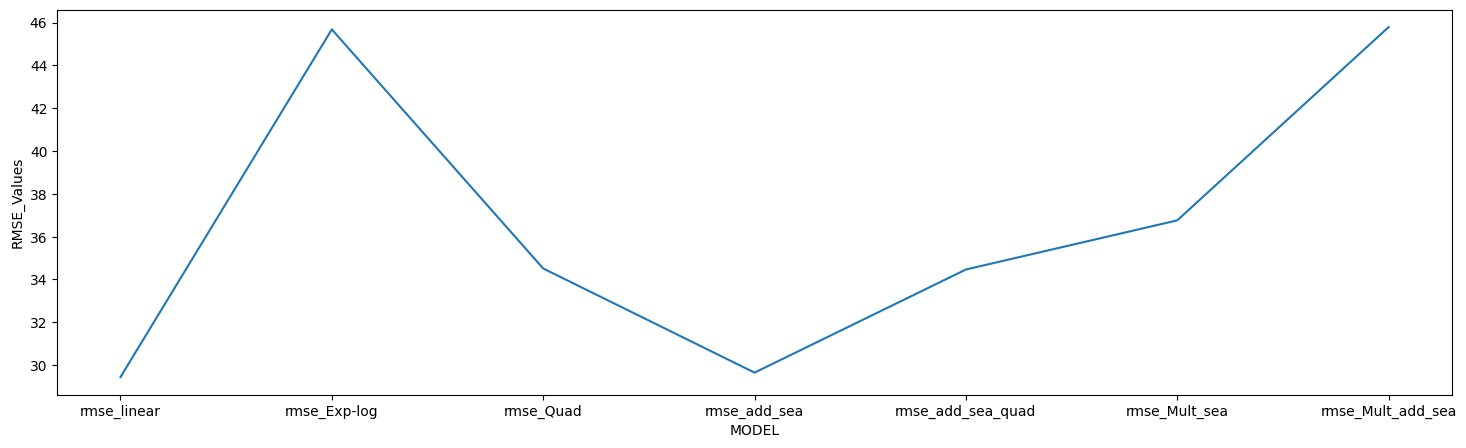

In [66]:
plt.figure(figsize=(18,5))
sns.lineplot(data=Result, x='MODEL',y='RMSE_Values')

### we can see here linear model and additive seasonality model posses minimum RMSE value.

In [67]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Closing_value'])

def adfuller_test(Closing_value):
  result=adfuller(Closing_value)
  labels = ['ADF_stats', 'P_Value', 'Num of Lags', 'no of observations']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))


In [68]:
adfuller_test(df['Closing_value'])

ADF_stats : -2.2926855130122408
P_Value : 0.17433789251256648
Num of Lags : 38
no of observations : 9569


## here p value is greater than 0.05 hense null hypothesis accepted (indicating it is a non stationary value)

In [69]:
df1 =pd.DataFrame(df['Closing_value'])
df1

,Closing_value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-10-03,89.23
2023-10-04,84.22
2023-10-05,82.31


### Downloding The Processed Data set

In [70]:
df1.to_csv('Oil Prices')

In [71]:
! ls

'Crude Oil Prices Daily 1986-2023.xlsx'   df  'Oil Prices'   sample_data


# Differencing

In [72]:
df1['Sfirst_diff'] = df1['Closing_value']-df1['Closing_value'].shift(1)
df1['Seasonal First Difference'] = df1['Closing_value']-df1['Closing_value'].shift(30)
df1

,Closing_value,Sfirst_diff,Seasonal First Difference
Date,,,
1986-01-02,25.56,NaN,NaN
1986-01-03,26.00,0.44,NaN
1986-01-06,26.53,0.53,NaN
1986-01-07,25.85,-0.68,NaN
1986-01-08,25.87,0.02,NaN
...,...,...,...
2023-10-03,89.23,0.41,10.34
2023-10-04,84.22,-5.01,5.17
2023-10-05,82.31,-1.91,2.48


In [73]:
# Again test dicky fuller test
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF_stats : -9.992169377016303
P_Value : 1.9829002335268452e-17
Num of Lags : 38
no of observations : 9539


## here p value is far less than 0.05 hens null hypo. rejected; data has no unit root and it is stationary

<Axes: xlabel='Date'>

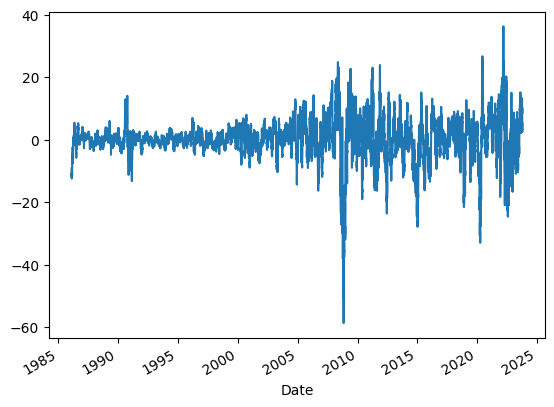

In [74]:
df1['Seasonal First Difference'].plot()

In [75]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

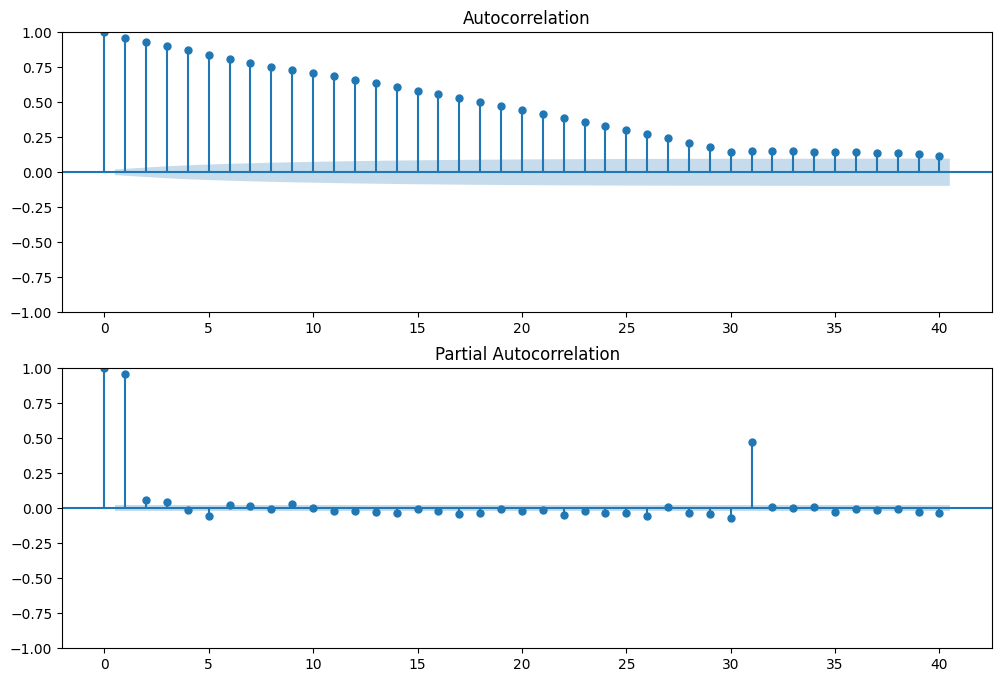

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['Seasonal First Difference'].iloc[30:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['Seasonal First Difference'].iloc[30:],lags=40,ax=ax2)

## For non seasonal data
### from partial auto correlation p=2, d=1 & q=5

In [77]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(Train['Closing_value'],order=(5,1,0))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:          Closing_value   No. Observations:                 8000
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12383.017
Date:                Wed, 08 Nov 2023   AIC                          24778.034
Time:                        16:19:30   BIC                          24819.956
Sample:                             0   HQIC                         24792.383
                               - 8000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0533      0.004    -13.105      0.000      -0.061      -0.045
ar.L2         -0.0255      0.006     -4.249      0.000      -0.037      -0.014
ar.L3          0.0245      0.006      4.265      0.0

# Making Prediction on Testset

In [79]:
start = len(Train)
end = len(Train) + len(Test)-1
pred = model.predict(start=start,end=end,dynamic=True)
pred.index=df.index[start:end+1]
pred=pd.DataFrame(pred)
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
Date,
2017-09-06,48.649050
2017-09-07,48.559736
2017-09-08,48.595690
2017-09-11,48.627932
2017-09-12,48.561201
...,...
2023-10-03,48.567474
2023-10-04,48.567474
2023-10-05,48.567474


<Axes: xlabel='Date'>

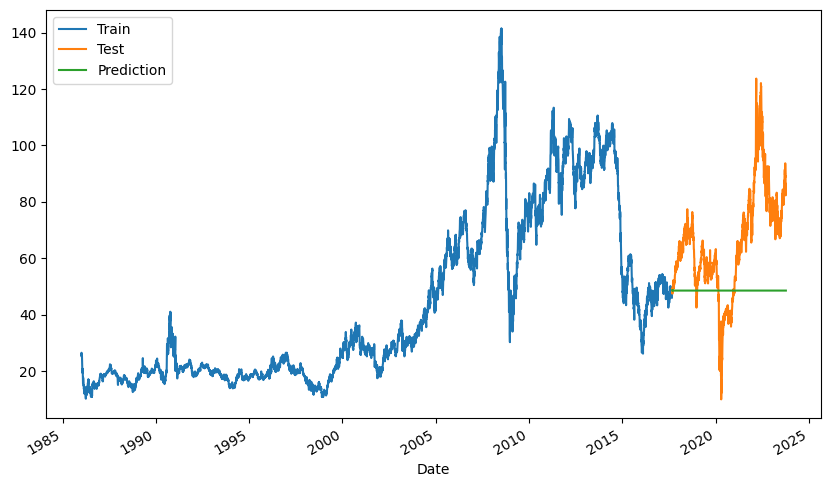

In [80]:
Train['Closing_value'].plot(legend=True, label='Train', figsize=(10,6))
Test['Closing_value'].plot(legend=True, label='Test')
pred['predicted_mean'].plot(legend=True, label='Prediction')

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,Test['Closing_value']))
print(rmse)

25.597427732914632


#Future Prediction

In [82]:
index_future_dates=pd.date_range(start='2023-10-09', end='2024-10-09' )

pred2 = model.predict(start=len(df),end=len(df)+366,typ='levels')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [83]:
index_future_dates

DatetimeIndex(['2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
               '2023-10-13', '2023-10-14', '2023-10-15', '2023-10-16',
               '2023-10-17', '2023-10-18',
               ...
               '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03',
               '2024-10-04', '2024-10-05', '2024-10-06', '2024-10-07',
               '2024-10-08', '2024-10-09'],
              dtype='datetime64[ns]', length=367, freq='D')

In [84]:
pred2.index=index_future_dates
pred2=pd.DataFrame(pred2)
pred2

,predicted_mean
2023-10-09,48.567474
2023-10-10,48.567474
2023-10-11,48.567474
2023-10-12,48.567474
2023-10-13,48.567474
...,...
2024-10-05,48.567474
2024-10-06,48.567474
2024-10-07,48.567474
2024-10-08,48.567474


<Axes: xlabel='Date'>

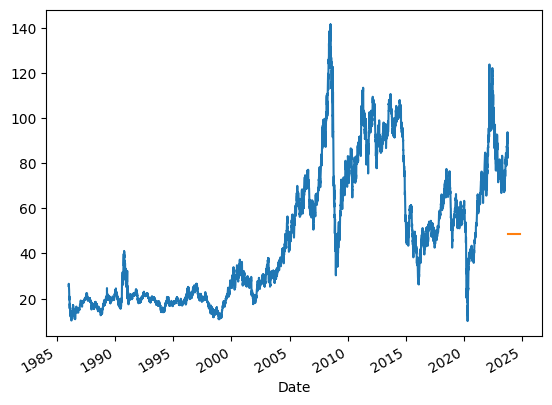

In [85]:
df['Closing_value'].plot()
pred2['predicted_mean'].plot()